In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statistics
%matplotlib inline

In [3]:
df = sns.load_dataset('iris')

In [4]:
df.head(2)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa

In [5]:
df['sepal_length'].mean()

5.843333333333335

In [6]:
df['sepal_length'].median()

5.8

In [7]:
df['sepal_length'].mode()

0    5.0
Name: sepal_length, dtype: float64

C:\Users\shivantripathi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_length'>

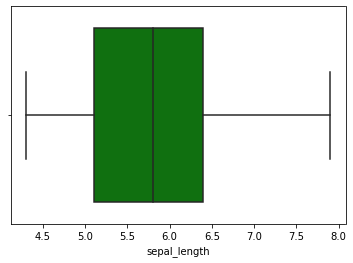

In [39]:
sns.boxplot(df['sepal_length'], color = 'green')

In [10]:
df['sepal_length'].min()

4.3

In [11]:
df['sepal_length'].max()

7.9

* thus we can see there are no such outliers for 'sepal_length' on the box plot

In [12]:
df.head(2)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa

C:\Users\shivantripathi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_width'>

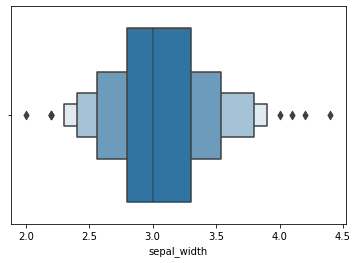

In [14]:
sns.boxenplot(df['sepal_width'])

In [15]:
df['sepal_width'].mean()

3.057333333333334

In [16]:
df['sepal_width'].median()

3.0

In [17]:
df['sepal_width'].min()

2.0

In [18]:
df['sepal_width'].max()

4.4

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

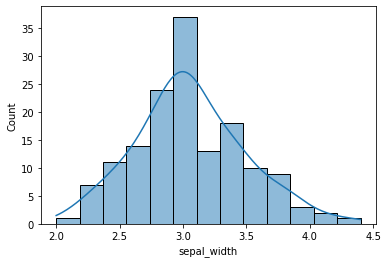

In [19]:
sns.histplot(df['sepal_width'], kde = True)

* thus 'sepal_width' is normally distributed as shown in the graph above.

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

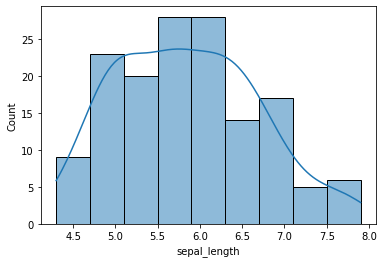

In [20]:
sns.histplot(df['sepal_length'], kde = True)

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

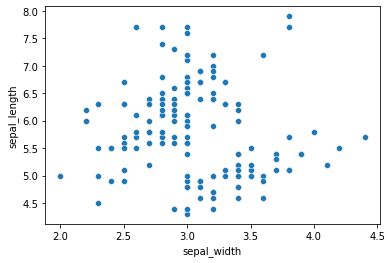

In [26]:
sns.scatterplot(x = df['sepal_width'], y = df['sepal_length'])

In [70]:
def find_outlier(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3-q1
    print('the value of q1 is ', q1)
    print('the value of q3 is ', q3)
    outliers = df[(df<(q1-1.5*IQR))  | (df<(q3+1.5*IQR))]
    return outliers
find_outlier(df)

the value of q1 is  sepal_length    5.1
sepal_width     2.8
petal_length    1.6
petal_width     0.3
Name: 0.25, dtype: float64
the value of q3 is  sepal_length    6.4
sepal_width     3.3
petal_length    5.1
petal_width     1.8
Name: 0.75, dtype: float64


C:\Users\shivantripathi\AppData\Local\Temp\ipykernel_21580\1645695248.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[(df<(q1-1.5*IQR))  | (df<(q3+1.5*IQR))]


sepal_length  sepal_width  petal_length  petal_width species
0             5.1          3.5           1.4          0.2     NaN
1             4.9          3.0           1.4          0.2     NaN
2             4.7          3.2           1.3          0.2     NaN
3             4.6          3.1           1.5          0.2     NaN
4             5.0          3.6           1.4          0.2     NaN
..            ...          ...           ...          ...     ...
145           6.7          3.0           5.2          2.3     NaN
146           6.3          2.5           5.0          1.9     NaN
147           6.5          3.0           5.2          2.0     NaN
148           6.2          3.4           5.4          2.3     NaN
149           5.9          3.0           5.1          1.8     NaN

[150 rows x 5 columns]

In [71]:
# print('The total no of outliers are: ', find_outlier[df['sepal_width']])
outliers = find_outlier(df[['sepal_width', 'sepal_length']])

the value of q1 is  sepal_width     2.8
sepal_length    5.1
Name: 0.25, dtype: float64
the value of q3 is  sepal_width     3.3
sepal_length    6.4
Name: 0.75, dtype: float64


In [72]:
outliers

sepal_width  sepal_length
0            3.5           5.1
1            3.0           4.9
2            3.2           4.7
3            3.1           4.6
4            3.6           5.0
..           ...           ...
145          3.0           6.7
146          2.5           6.3
147          3.0           6.5
148          3.4           6.2
149          3.0           5.9

[150 rows x 2 columns]

In [50]:
print('total number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))
# outliers

total number of outliers: 150
max outlier value: sepal_width     4.0
sepal_length    7.9
dtype: float64
min outlier value: sepal_width     2.0
sepal_length    4.3
dtype: float64


In [51]:
df['sepal_width'].std()

0.435866284936698

In [95]:
outliers1 = []
def detect_outliers1(df):
    threshold = 3
    mean = df.mean()
    std_dev = df.std()
    for i in df:
        z_score = (i-mean)/std_dev
        if z_score >3:
            outliers1.append(i)
    return outliers1

In [96]:
outliers1 = detect_outliers1(df['sepal_width'])

In [97]:
outliers1

[4.4]

In [98]:
outliers2 = []
def detect_outliers2(df):
    threshold = 3
    mean = df.mean()
    std_dev = df.std()
    for i in df:
        z_score = (i-mean)/std_dev
        if z_score >3:
            outliers2.append(i)
    return outliers2

In [99]:
outlier2 = detect_outliers2(df['sepal_length'])

In [100]:
outliers2

[]

In [55]:
df['sepal_width']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [63]:
df['sepal_width'].sort_values(ascending = False)

15     4.4
33     4.2
32     4.1
14     4.0
16     3.9
      ... 
87     2.3
62     2.2
68     2.2
119    2.2
60     2.0
Name: sepal_width, Length: 150, dtype: float64

In [101]:
df['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64